In [ ]:
# Text train 데이터.csv 읽기
# column이 없는 데이터셋이라 header를 None으로 하고 임의로 라벨을 지정해서 사용할 예정입니다.
#text_df = pd.read_csv('twitter_training.csv', header=None)
# 실제로는 위와 비슷한 명칭으로 데이터를 불러서 사용합니다.

text_df = pd.read_csv('https://raw.githubusercontent.com/suku-7/AICE-Pro-share/refs/heads/main/twitter_training.csv', header=None)
text_df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# Text 데이터 전처리 - 감정 분류에 불필요한 데이터셋 제거
text_df = text_df.drop([0, 1], axis=1)

In [ ]:
# Text 데이터 전처리 - column 임의로 지정 label, text
text_df = text_df.rename(columns={2:'label', 3:'text'})
text_df

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


In [ ]:
# Text 데이터 전처리 - 결측치 확인
text_df.isnull().sum()

,0
label,0
text,686


In [ ]:
# Text 데이터 전처리 - 결측치 확인
text_df = text_df.dropna()

In [ ]:
# Text 데이터 전처리 - 불용어 여부 확인
# '[^a-zA-Z ]' 으로 적으면 소문자, 대문자, 공백 제외 다른 문자나 숫자가 있는지 확인
# '[^가-힣 ]' 으로 적으면 한글, 공백 제외 다른 문자나 숫자가 있는지 확인
# '[^a-zA-Z가-힣 ]' 으로 적으면 영문, 한글, 공백 제외
# [^a-zA-Z가-힣] <- 공백이 없이 만들면 이후 작업에서 띄어쓰기에 필요한 공백을 모두 제거해버려서 문제가 됩니다.

text_df[text_df['text'].str.contains('[^a-zA-Z ]')].head(3)

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [ ]:
# Text 영문자 제외 모두 ''으로 변경
text_df['text'] = text_df['text'].str.replace('[^a-zA-Z ]', '', regex=True)
# Text 문자열의 앞뒤 공백을 제거
text_df['text'] = text_df['text'].str.strip()
# Text 소문자로 변경
text_df['text'] = text_df['text'].str.lower()
# Text 중복 여부 확인 / 6997개 인 것 확인
text_df['text'].duplicated().sum()

<ipython-input-46-4ef7be13015a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.replace('[^a-zA-Z ]', '', regex=True)
<ipython-input-46-4ef7be13015a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text'] = text_df['text'].str.strip()
<ipython-input-46-4ef7be13015a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

np.int64(6997)

In [ ]:
# Text 중복 제거
text_df.drop_duplicates(subset='text', inplace=True)

<ipython-input-47-8fbce50339b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df.drop_duplicates(subset='text', inplace=True)


In [ ]:
# Text 중복 제거 확인
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66999 entries, 0 to 74681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   66999 non-null  object
 1   text    66999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
# Text 라벨이 어떤 종류가 있는지 확인
text_df['label'].value_counts()

,count
label,
Negative,20455
Positive,18215
Neutral,16519
Irrelevant,11810


In [ ]:
# Text 라벨 인코딩
text_class_to_label = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
text_df['label'] = text_df['label'].map(text_class_to_label)

<ipython-input-50-6d2bea400fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['label'] = text_df['label'].map(text_class_to_label)


In [ ]:
# Text 라벨 인코딩 제대로 되었는지 확인
text_df['label'].value_counts()

,count
label,
0,20455
1,18215
2,16519
3,11810


In [ ]:
# Text feature, label 분류
text_features = text_df['text']
text_labels = text_df['label']

In [ ]:
# Text train, valid 데이터셋 나누기
text_x_train, text_x_valid, text_y_train, text_y_valid = train_test_split(text_features, text_labels, test_size=0.2, random_state=42, stratify=text_labels)
text_x_train.shape, text_x_valid.shape, text_y_train.shape, text_y_valid.shape

((53599,), (13400,), (53599,), (13400,))

In [ ]:
# Text 분류, TFIDF-머신러닝 모델로 분류하기
# 사용방법이 비교적 단순하고 전처리도 거의 없어서 먼저 해봅니다.
# TF-IDF는 텍스트가 포함된 벡터의 특성에 따라 각 단어의 가중치를 계산하고,
# 그 가중치를 이용해 문서나 텍스트를 분류하거나 회귀 모델에 입력으로 사용합니다.

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_x_train_v = tfidf.fit_transform(text_x_train)
text_x_valid_v = tfidf.transform(text_x_valid)

In [ ]:
# Text LogisticRegression 모델 성능 확인
text_lgr = LogisticRegression()
text_lgr.fit(text_x_train_v, text_y_train)
text_lgr.score(text_x_valid_v, text_y_valid)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7642537313432836

In [ ]:
# Text SGDClassifer 모델 성능 확인
text_sgdc = SGDClassifier()
text_sgdc.fit(text_x_train_v, text_y_train)
text_sgdc.score(text_x_valid_v, text_y_valid)

0.7161940298507463

In [ ]:
# Text DecisionTreeClassifier 모델 성능 확인
text_dtc = DecisionTreeClassifier()
text_dtc.fit(text_x_train_v, text_y_train)
text_dtc.score(text_x_valid_v, text_y_valid)

0.7198507462686567

In [ ]:
# Text RandomForestClassifier 모델 성능 확인
text_rfc = RandomForestClassifier()
text_rfc.fit(text_x_train_v, text_y_train)
text_rfc.score(text_x_valid_v, text_y_valid)

0.9085820895522388

In [ ]:
# Text Tokenizer - 딥러닝 분석을 위한 라이브러리 임포트
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Text Tokenizer 작업
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_x_train)

In [ ]:
# Tokenizer에 학습한 단어가 어떤게 있는지 확인용입니다. 작성하지 않아도 괜찮아요.
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'to': 3, 'and': 4, 'a': 5, 'of': 6, 'is': 7, 'for': 8, 'in': 9, 'this': 10, 'it': 11, 'on': 12, 'you': 13, 'my': 14, 'that': 15, 'with': 16, 'game': 17, 'so': 18, 'me': 19, 'just': 20, 'but': 21, 'have': 22, 'be': 23, 'are': 24, 'not': 25, 'all': 26, 'was': 27, 'at': 28, 'its': 29, 'im': 30, 'like': 31, 'out': 32, 'from': 33, 'your': 34, 'now': 35, 'get': 36, 'we': 37, 'as': 38, 'they': 39, 'if': 40, 'can': 41, 'one': 42, 'about': 43, 'has': 44, 'good': 45, 'play': 46, 'will': 47, 'no': 48, 'an': 49, 'new': 50, 'when': 51, 'really': 52, 'up': 53, 'love': 54, 'more': 55, 'do': 56, 'what': 57, 'by': 58, 'how': 59, 'or': 60, 'johnson': 61, 'see': 62, 'why': 63, 'people': 64, 'dont': 65, 'shit': 66, 'some': 67, 'cant': 68, 'been': 69, 'time': 70, 'still': 71, 'best': 72, 'got': 73, 'games': 74, 'even': 75, 'great': 76, 'who': 77, 'playing': 78, 'because': 79, 'fucking': 80, 'xbox': 81, 'go': 82, 'please': 83, 'amazon': 84, 'facebook': 85, 'google': 86, 'had': 87, 'fuck':

In [ ]:
# Tokenizer에 학습한 단어별 빈도 수 확인용입니다. 작성하지 않아도 괜찮아요.
print(tokenizer.word_counts)

OrderedDict([('goddamnit', 3), ('new', 2537), ('assassins', 711), ('been', 2012), ('so', 5977), ('fire', 168), ('theyre', 250), ('gonna', 585), ('jig', 4), ('me', 5323), ('again', 1251), ('and', 20668), ('of', 14738), ('course', 110), ('everyone', 843), ('remember', 253), ('i', 22316), ('bet', 41), ('rhandlerr', 1470), ('in', 11977), ('an', 2564), ('earlier', 74), ('tweet', 235), ('that', 7672), ('they', 2938), ('should', 783), ('cover', 83), ('at', 4045), ('least', 226), ('three', 223), ('months', 278), ('my', 9026), ('bill', 111), ('because', 1684), ('pretty', 565), ('much', 1437), ('guessed', 9), ('wasting', 47), ('time', 1994), ('with', 7015), ('them', 1321), ('be', 4687), ('a', 18616), ('waste', 69), ('too', 999), ('guess', 231), ('what', 2342), ('ante', 5), ('up', 2458), ('pictwittercomcycrdcxss', 2), ('red', 1331), ('dead', 1478), ('redemption', 941), ('got', 1777), ('wanting', 47), ('to', 21941), ('move', 203), ('mother', 46), ('fucking', 1615), ('ranch', 3), ('really', 2515), 

In [ ]:
# Tokenizer가 학습한 단어의 개수를 확인합니다.
max_words = len(tokenizer.word_index)
max_words

35958

In [ ]:
# Tokenizer 시퀀스 작업
text_x_train_seq = tokenizer.texts_to_sequences(text_x_train)
text_x_valid_seq = tokenizer.texts_to_sequences(text_x_valid)

In [ ]:
# Tokenizer 시퀀스 작업 후 가장 긴 문장의 단어 개수를 찾습니다.
max(len(i) for i in text_x_train_seq)

166

In [ ]:
# Tokenizer 시퀀스 이후 pad 작업을 하여 가장 긴 문장의 단어수에 맞춰서 공백을 0으로 채워줍니다.
text_x_train_pad = pad_sequences(text_x_train_seq, maxlen=166)
text_x_valid_pad = pad_sequences(text_x_valid_seq, maxlen=166)

In [ ]:
# Text label 갯수 확인용 (4개)
text_labels.value_counts()

,count
label,
0,20455
1,18215
2,16519
3,11810


In [ ]:
# Text 딥러닝 모델
text_model = Sequential()
text_model.add(Embedding(input_dim=max_words+1, output_dim=100, input_length=166))
text_model.add(Bidirectional(LSTM(16, return_sequences=True)))
text_model.add(Dropout(0.3))
text_model.add(Bidirectional(LSTM(16, return_sequences=False)))
text_model.add(Dropout(0.3))
text_model.add(Dense(64, activation='swish'))
text_model.add(BatchNormalization())
text_model.add(Dropout(0.3))
text_model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Text 딥러닝 모델 compile
text_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Text는 es2, mc2, history2 처럼 변수에 2를 붙여서 사용했습니다.
# 같은 코드 안에서 3개의 모델을 만들어서 비슷한 변수명에 숫자나, text, img를 붙였습니다.

es2 = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
mc2 = ModelCheckpoint('best_text_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

history2 = text_model.fit(
    text_x_train_pad, text_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(text_x_valid_pad, text_y_valid),
    callbacks=[es2, mc2],
    verbose=1
)

Epoch 1/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4364 - loss: 1.2234
Epoch 1: val_loss improved from inf to 1.25177, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.4376 - loss: 1.2216 - val_accuracy: 0.5882 - val_loss: 1.2518
Epoch 2/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8288 - loss: 0.4851
Epoch 2: val_loss improved from 1.25177 to 0.96368, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.8290 - loss: 0.4846 - val_accuracy: 0.7831 - val_loss: 0.9637
Epoch 3/5
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9267 - loss: 0.2259
Epoch 3: val_loss improved from 0.96368 to 0.57318, saving model to best_text_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9267 - loss: 0.2259 - val_accuracy: 0.8449 - val_loss: 0.5732
Epoch 4/5
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9445 - loss: 0.1625
Epoch 4: val_loss improved from 0.5

In [ ]:
# 위의 Text 모델 성능은 0.873이 나왔네요.
# Text Test 데이터셋.csv 불러오기
# 실제로는 위와 비슷한 명칭으로 데이터를 불러서 사용합니다.

text_df5 = pd.read_csv('https://raw.githubusercontent.com/suku-7/AICE-Pro-share/refs/heads/main/twitter_validation.csv', header=None)
text_df5

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Text Test 데이터셋 전처리 - 불필요한 column 삭제, 결측치 확인
text_df5 = text_df5.drop([0, 1], axis=1)
text_df5 = text_df5.rename(columns={2:'label', 3:'text'})
text_df5.isnull().sum()

,0
label,0
text,0


In [ ]:
# Text Test 데이터셋 전처리 - 불용어 여부 확인
text_df5[text_df5['text'].str.contains('[^a-zA-Z ]')].head(3)

,label,text
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...


In [ ]:
# Text Test 데이터셋 불용어 제거
text_df5['text'] = text_df5['text'].str.replace('[^a-zA-Z ]', '', regex=True)
# Text Test 데이터셋 앞뒤에 공백 제거
text_df5['text'] = text_df5['text'].str.strip()
# Text Test 데이터셋 소문자로 변경
text_df5['text'] = text_df5['text'].str.lower()
# Text Test 데이터셋 중복 여부, 갯수 확인
text_df5['text'].duplicated().sum()

# Train Data와 다르게 Test 데이터셋은 중복이 있어도 지우지 않았습니다.

np.int64(3)

In [ ]:
# Text Test 데이터셋 라벨 종류, 갯수 확인
text_df5['label'].value_counts()

,count
label,
Neutral,285
Positive,277
Negative,266
Irrelevant,172


In [ ]:
# Text Test 데이터셋 라벨 인코딩, 제대로 되었는지 확인 (Train 데이터셋하고 동일하게)
text_class_to_label = {'Negative':0, 'Positive':1, 'Neutral':2, 'Irrelevant':3}
text_df5['label'] = text_df5['label'].map(text_class_to_label)
text_df5['label'].value_counts()

,count
label,
2,285
1,277
0,266
3,172


In [ ]:
# Text Test 데이터셋 feature, label 분류
text_x_test = text_df5['text']
text_y_test = text_df5['label']
# Text Test 데이터 모델 성능 확인을 위해 데이터 전처리, Tfidf, Tokenizer
text_x_test_v = tfidf.transform(text_x_test)
text_x_test_seq = tokenizer.texts_to_sequences(text_x_test)
text_x_test_pad = pad_sequences(text_x_test_seq)

In [ ]:
# Text Test 데이터셋 모델로 예측하기.
text_rfc_y_pred = text_rfc.predict(text_x_test_v)
text_model_y_pred = text_model.predict(text_x_test_pad)
text_model_y_pred = np.argmax(text_model_y_pred, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


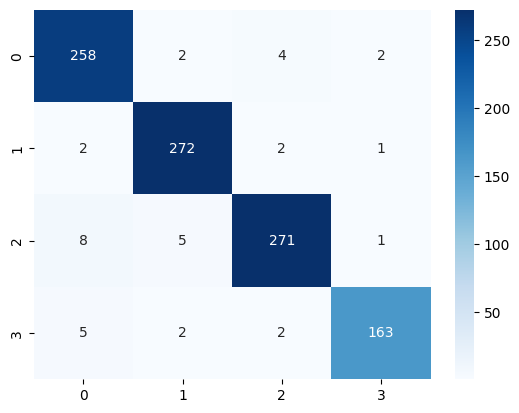

In [ ]:
# Text Test 데이터셋에 label이 있어서 예측한 것과 비교용으로 시각화 하였습니다.
# 실제로는 label이 없기 때문에 확인할 수 없습니다.
# Text RandomForestClassifier 모델
text_cm = confusion_matrix(text_y_test, text_rfc_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

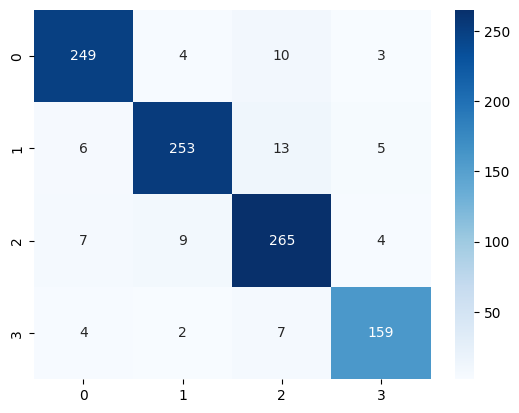

In [ ]:
# Text 딥러닝 모델
text_cm = confusion_matrix(text_y_test, text_model_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
# Text RandomForestClassifier는 훈련 데이터셋 기준 0.908
# Text 딥러닝은 훈련 데이터셋 기준 0.873이 나와서 RandomForest 모델을 선택했습니다.
# Text 데이터 라벨이 4개인 분류인데 96% 성능이면 꽤 좋은거 같습니다.
# 위에서도 말씀드렸지만, Test Dataset에 라벨이 있기 때문에 예측값과 비교한 부분입니다.
# 실제로는 불필요한 부분입니다.

text_df5['pred'] = text_rfc_y_pred
text_correct_count = sum(text_df5['label']==text_df5['pred'])
text_total_count = len(text_df5)
text_model_accuracy = text_correct_count/text_total_count
print(f'text_model_accuracy : {text_model_accuracy:.2f}')

text_model_accuracy : 0.96


In [ ]:
# Text dataset에 예측한 값을 csv에 추가
text_df5['pred'] = text_rfc_y_pred
text_df5

,label,text,pred
0,3,i mentioned on facebook that i was struggling ...,3
1,2,bbc news amazon boss jeff bezos rejects claim...,2
2,0,microsoft why do i pay for word when it functi...,0
3,0,csgo matchmaking is so full of closet hacking ...,0
4,2,now the president is slapping americans in the...,2
...,...,...,...
995,3,toronto is the arts and culture capital of can...,3
996,3,this is actually a good move tot bring more vi...,3
997,1,today sucked so its time to drink wine n play ...,1
998,1,bought a fraction of microsoft today small wins,1


In [ ]:
# Text dataset 라벨 인코딩 했던 것 원상태로
text_label_to_class = {0:'Negative', 1:'Positive', 2:'Neutral', 3:'Irrelevant'}
text_df5['label'] = text_df5['label'].map(text_label_to_class)
text_df5['pred'] = text_df5['pred'].map(text_label_to_class)
text_df5

,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral
...,...,...,...
995,Irrelevant,toronto is the arts and culture capital of can...,Irrelevant
996,Irrelevant,this is actually a good move tot bring more vi...,Irrelevant
997,Positive,today sucked so its time to drink wine n play ...,Positive
998,Positive,bought a fraction of microsoft today small wins,Positive


In [ ]:
# Text Test 데이터셋.csv 저장 및 불러와서 확인
text_df5.to_csv('result_2.csv', index=False, encoding='utf-8')
text_df6 = pd.read_csv('result_2.csv')
text_df6

,label,text,pred
0,Irrelevant,i mentioned on facebook that i was struggling ...,Irrelevant
1,Neutral,bbc news amazon boss jeff bezos rejects claim...,Neutral
2,Negative,microsoft why do i pay for word when it functi...,Negative
3,Negative,csgo matchmaking is so full of closet hacking ...,Negative
4,Neutral,now the president is slapping americans in the...,Neutral
...,...,...,...
995,Irrelevant,toronto is the arts and culture capital of can...,Irrelevant
996,Irrelevant,this is actually a good move tot bring more vi...,Irrelevant
997,Positive,today sucked so its time to drink wine n play ...,Positive
998,Positive,bought a fraction of microsoft today small wins,Positive


In [ ]:
# Text RandomForestClassifier 모델 저장
joblib.dump(text_rfc, 'model2.joblib')

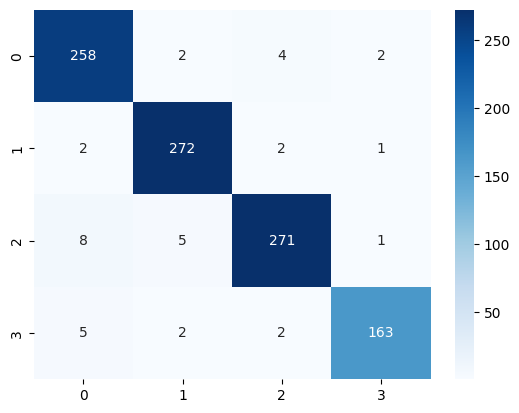

In [ ]:
# Text 모델 저장 잘 되었는지 불러와서 성능 확인
text_load_model = joblib.load('01012345678_2.joblib')
text_load_y_pred = text_load_model.predict(text_x_test_v)
text_cm = confusion_matrix(text_y_test, text_load_y_pred)
sns.heatmap(data=text_cm, annot=True, fmt='d', cmap='Blues')
plt.show()